**Finance data - RNN**

1. dataset

In [1]:
!pip install -U finance-datareader

In [2]:
import FinanceDataReader as fdr
import numpy as np
import matplotlib.pyplot as plt

In [34]:
df_krx = fdr.StockListing('KRX')
df_krx.head()

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,72100,1,1300,1.84,71600,72200,71500,16000419,1149974075500,430421321855000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,450000,1,13000,2.97,460000,460000,448500,280271,127083087000,105300000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,133900,1,3900,3.00,133900,134200,132100,2744822,366551362400,97479516673500,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,729000,1,9000,1.25,728000,732000,722000,42885,31157675000,51885846000000,71174000,STK
4,005935,KR7005931001,삼성전자우,KOSPI,,57600,1,400,0.70,57700,57900,57400,803789,46329191550,47398273920000,822886700,STK


<Axes: xlabel='Date'>

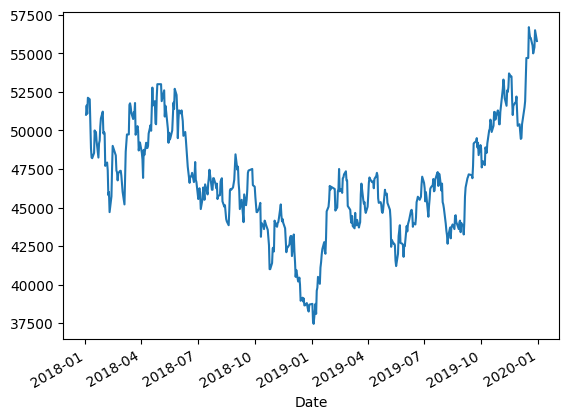

In [36]:
df = fdr.DataReader('005930', '2018', '2020')
df['Close'].plot()

In [37]:
df = fdr.DataReader('005930', '2018-05-04', '2020-01-22')
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-05-04,53000,53900,51800,51900,39565391,-0.020755
2018-05-08,52600,53200,51900,52600,23104720,0.013487
2018-05-09,52600,52800,50900,50900,16128305,-0.032319
2018-05-10,51700,51700,50600,51600,13905263,0.013752
2018-05-11,52000,52200,51200,51300,10314997,-0.005814


In [38]:
print(df.shape)

(421, 6)


In [39]:
def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

In [45]:
dfx = df[['Open','High','Low','Volume', 'Close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['Close']]
dfx = dfx[['Open','High','Low','Volume']]
dfx

,Open,High,Low,Volume
Date,,,,
2018-05-04,0.633401,0.646825,0.601610,0.595060
2018-05-08,0.617108,0.619048,0.605634,0.316465
2018-05-09,0.617108,0.603175,0.565392,0.198390
2018-05-10,0.580448,0.559524,0.553320,0.160765
2018-05-11,0.592668,0.579365,0.577465,0.100000
...,...,...,...,...
2020-01-16,0.881874,0.916667,0.891348,0.168830
2020-01-17,0.995927,0.968254,0.971831,0.196653
2020-01-20,1.000000,1.000000,1.000000,0.137469


In [41]:
dfx.describe()

,Open,High,Low,Volume
count,421.000000,421.000000,421.000000,421.000000
mean,0.372409,0.374434,0.373457,0.117439
std,0.175834,0.171931,0.171432,0.084973
min,0.000000,0.000000,0.000000,0.000000
25%,0.262729,0.267857,0.269618,0.064016
50%,0.350305,0.349206,0.352113,0.101418
75%,0.443992,0.452381,0.444668,0.146095
max,1.000000,1.000000,1.000000,1.000000


In [42]:
X = dfx.values.tolist()
y = dfy.values.tolist()

In [9]:
window_size = 10

data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_X.append(_X)
    data_y.append(_y)
print(_X, "->", _y)

[[0.7637474541720417, 0.7857142857111677, 0.7665995975824281, 0.323174686971615], [0.8533604887948947, 0.8333333333300265, 0.8269617706204146, 0.33335345138624783], [0.8696537678172315, 0.8769841269806469, 0.8631790744432065, 0.19622106804249292], [0.9022403258619053, 0.8888888888853615, 0.8953722333967993, 0.117672127572782], [0.9348268839065791, 0.9285714285677438, 0.927565392350392, 0.21155713424914332], [0.898167006106321, 0.8730158730124087, 0.8873239436584011, 0.1674615836301646], [0.8818737270839841, 0.9166666666630291, 0.8913480885276002, 0.16882989330989187], [0.9959266802403425, 0.968253968250126, 0.9718309859115821, 0.19665250042066781], [0.9999999999959267, 0.9999999999960317, 0.9999999999959758, 0.13746944253371812], [0.9999999999959267, 0.9841269841230789, 0.9798792756499803, 0.11400880277083453]] -> [0.9959919839639438]


In [10]:
print('전체 데이터의 크기 :', len(data_X), len(data_y))

전체 데이터의 크기 : 411 411


In [23]:
train_size = int(len(data_y) * 0.7)
train_X = np.array(data_X[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_X = np.array(data_X[train_size : len(data_X)])
test_y = np.array(data_y[train_size : len(data_y)])

print('훈련 데이터의 크기 :', train_X.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_X.shape, test_y.shape)

훈련 데이터의 크기 : (287, 10, 4) (287, 1)
테스트 데이터의 크기 : (124, 10, 4) (124, 1)


2. model

In [29]:
import torch
import torch.nn as nn
import torch.optim as optim

In [32]:

seq_length = 7
data_dim = 4
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
iterations = 500

In [47]:

trainX_tensor = torch.FloatTensor(train_X)
trainY_tensor = torch.FloatTensor(train_y)
testX_tensor = torch.FloatTensor(test_X)
textY_tensor = torch.FloatTensor(test_y)

In [48]:

class Net(torch.nn.Module):
  def __init__(self, input_dim, hidden_dim, output_dim, layers):
    super(Net, self).__init__()
    self.rnn = torch.nn.RNN(input_dim, hidden_dim, num_layers = layers, batch_first=True)
    self.fc = torch.nn.Linear(hidden_dim, output_dim, bias = True)

  def forward(self, x):

    x, _ = self.rnn(x)
    x = self.fc(x[:, -1])
    return x


In [49]:

net = Net(data_dim, hidden_dim, output_dim, 1)

criterion = torch.nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr = learning_rate)

3. training

In [52]:

for i in range(iterations):
    outputs = net(trainX_tensor)
    loss = criterion(outputs, trainY_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if i % 50 ==  0:
        print(i, loss.item())



0 0.0009089052327908576
50 0.0009022192098200321
100 0.0008955561788752675
150 0.0008889348246157169
200 0.0008823811658658087
250 0.0008759283809922636
300 0.0008696177392266691
350 0.0008634951082058251
400 0.0008576071122661233
450 0.0008519981638528407


4. result

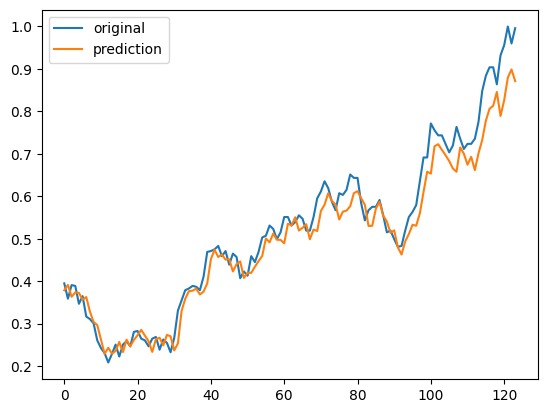

In [53]:

plt.plot(test_y)
plt.plot(net(testX_tensor).data.numpy())
plt.legend(['original', 'prediction'])
plt.show()